In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score

In [17]:
data = pd.read_csv("churn_clean.csv")

In [18]:
data.isnull().sum()

CaseOrder                  0
Customer_id                0
Interaction                0
UID                        0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
TimeZone                   0
Job                        0
Children                   0
Age                        0
Income                     0
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                     0
Contract                   0
Port_modem                 0
Tablet                     0
InternetService         2129
Phone                      0
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport   

In [19]:
data[data.duplicated()]

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8


In [20]:
data.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,...,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,...,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,...,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,...,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,...,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,...,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,...,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [21]:
columns = ['Age','Income','Outage_sec_perweek','Tenure','MonthlyCharge', 'Bandwidth_GB_Year']
new_data = data[columns]
new_data.head()

,Age,Income,Outage_sec_perweek,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,68,28561.99,7.978323,6.795513,172.455519,904.536110
1,27,21704.77,11.699080,1.156681,242.632554,800.982766
2,50,9609.57,10.752800,15.754144,159.947583,2054.706961
3,48,18925.23,14.913540,17.087227,119.956840,2164.579412
4,83,40074.19,8.147417,1.670972,149.948316,271.493436


In [22]:
scaler = StandardScaler()
new_data = pd.DataFrame(scaler.fit_transform(new_data), columns= columns)


In [23]:
new_data.head()

,Age,Income,Outage_sec_perweek,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,0.720925,-0.398778,-0.679978,-1.048746,-0.003943,-1.138487
1,-1.259957,-0.641954,0.570331,-1.262001,1.630326,-1.185876
2,-0.148730,-1.070885,0.252347,-0.709940,-0.295225,-0.612138
3,-0.245359,-0.740525,1.650506,-0.659524,-1.226521,-0.561857
4,1.445638,0.009478,-0.623156,-1.242551,-0.528086,-1.428184


In [24]:
new_data.to_csv("scaled_data.csv")

In [25]:
ks = range(1, 6)
inertia = []
for k in ks:
    model = KMeans(k, random_state= 42)
    model.fit(new_data)
    inertia.append(model.inertia_)
inertia_df = pd.DataFrame({'num_clusters': ks, 'inertia' : inertia})

C:\Users\jacob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jacob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jacob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

In [26]:
inertia_df

,num_clusters,inertia
0,1,60000.000000
1,2,41705.879498
2,3,37905.858658
3,4,34174.208531
4,5,31099.616856


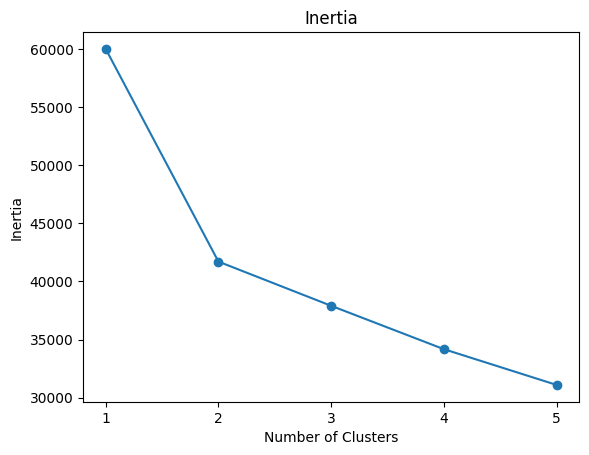

In [27]:
plt.plot(ks, inertia, '-o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.title('Inertia')
plt.show()

In [28]:
silhouette = []
sil = range(2,6)
for k in sil:
    model = KMeans(k, random_state= 42) 
    model.fit(new_data)
    labels = model.labels_
    silhouette_average = silhouette_score(new_data, labels)
    silhouette.append(silhouette_average)
sil_df = pd.DataFrame({'num_clusters': sil, 'sil_score': silhouette})

C:\Users\jacob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jacob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jacob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

In [29]:
sil_df

,num_clusters,sil_score
0,2,0.297775
1,3,0.219625
2,4,0.181656
3,5,0.187467


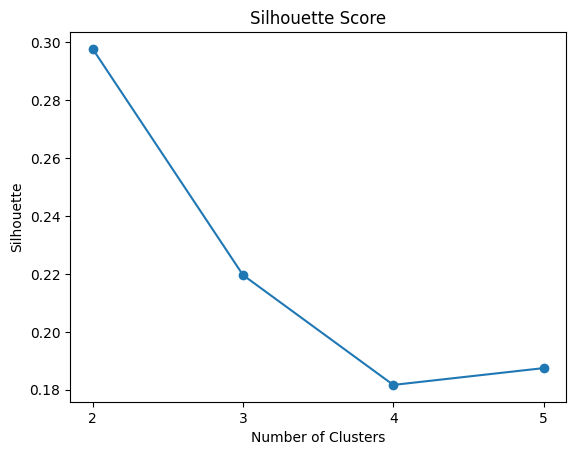

In [30]:
plt.plot(sil, silhouette, '-o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette')
plt.title('Silhouette Score')
plt.xticks(sil)
plt.show()